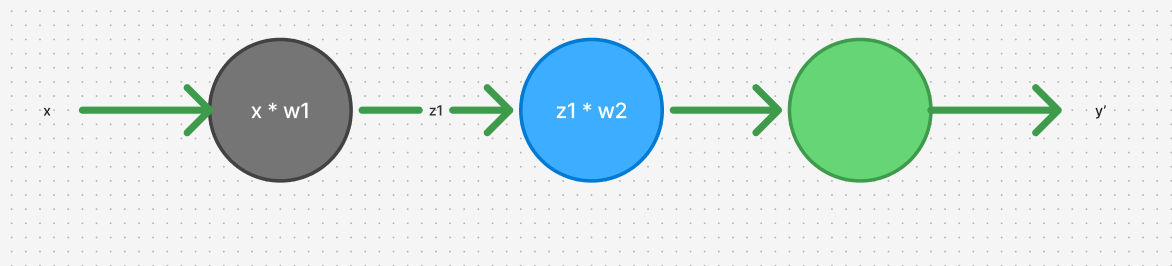

# Building single neuron network ❄

In [1]:
import numpy as np

def neuron_output(x1,x2, w1, w2, b):
    z = w1 * x1 + w2 * x2 + b
    return z

# Example inputs (e.g., hours studied, extra classes attended)

x1 = 5 # feature 1

x2 = 2 # feature 2

# Example weights and bias

w1 = 0.8

w2 = 1.2

b =-1.0

z = neuron_output(x1, x2, w1, w2, b) 
print("Linear combination (z):", z)

Linear combination (z): 5.4


- pass the output through a step function
- print a decision based on the output

- if the input is less than or equal to zero, output = 0
- otherwise output = 1

In [2]:
def activation(z):
    if z > 0:
        return 1
    return 0

y = activation(0) 

def output(y):
    if y == 0:
        print('Hell no, we wont going anywhere')
    else:
        print('Yeayyyy, Lets go!!!')

output(0)

Hell no, we wont going anywhere


In [3]:
output(activation(neuron_output(x1,x2, w1, w2, b)))

Yeayyyy, Lets go!!!


# MLP

- multi layer perceptron
- MLP Classifier

In [4]:
# Imports + load Iris dataset

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns

iris = load_iris()

x = pd.DataFrame(iris.data, columns=iris.feature_names)

y = pd.Series(iris.target, name="target")

print("X shape:", x.shape)

print("Class counts:\n", y.value_counts())

x.head()

X shape: (150, 4)
Class counts:
 target
0    50
1    50
2    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print('Train Size:',x_train.shape)
print('Test size:', x_test.shape)

Train Size: (120, 4)
Test size: (30, 4)


In [6]:
y_train

8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: target, Length: 120, dtype: int64

In [7]:
# Scale features (IMPORTANT for neural networks) 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.transform(x_test)

# Optional: quick check mean/std after scaling
print("After scaling (train):")
print("Mean (approx):", np.round (X_train_scaled.mean(axis=0), 3))
print("Std (approx):", np.round(X_train_scaled.std(axis=0), 3))

After scaling (train):
Mean (approx): [-0. -0.  0.  0.]
Std (approx): [1. 1. 1. 1.]


In [8]:
#Train an MLPClassifier (simple setup)

mlp = MLPClassifier(
hidden_layer_sizes=(10,),
activation="relu",
solver="adam",
max_iter=1000,      # max iterration
random_state=42     
)

mlp.fit(X_train_scaled,y_train)

#predict
mlp_predict = mlp.predict(X_test_scaled)

#accuracy
acc = accuracy_score(y_test,mlp_predict)

print('=== MLPCLassifier on iris ===')
print('Test accuracy:', round(acc,4))

=== MLPCLassifier on iris ===
Test accuracy: 0.9667


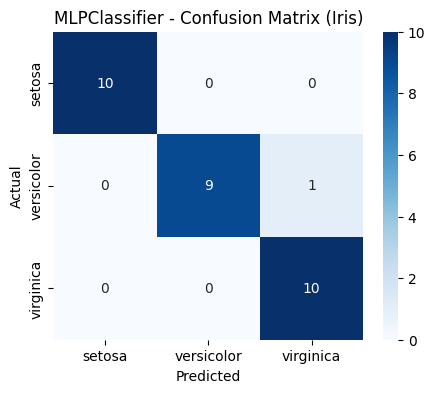

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# Confusion matrix + classification report

cm = confusion_matrix(y_test, mlp_predict)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt= "d", cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("MLPClassifier - Confusion Matrix (Iris)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, mlp_predict, target_names=iris.target_names))

# Exercise

In [10]:
mlp = MLPClassifier(
hidden_layer_sizes=(25,15),
activation="tanh",
solver="adam",
max_iter=170,      # max iterration
random_state=42     
)

mlp.fit(X_train_scaled,y_train)

#predict
mlp_predict = mlp.predict(X_test_scaled)

#accuracy
acc = accuracy_score(y_test,mlp_predict)

print('=== MLPCLassifier on iris ===')
print('Test accuracy:', round(acc,4))

=== MLPCLassifier on iris ===
Test accuracy: 0.9667


C:\Users\User\AppData\Roaming\Python\Python314\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  warnings.warn(


-----

---

# Building single neuron network ❄

In [11]:
import numpy as np

def neuron_output(x1,x2,w1,w2,b):

    z = w1 * x1 + w2 * x2 + b
    return z

x1 = 5
x2 = 2

w1 = 0.8
w2 = 1.2
b = -1.0

z = neuron_output(x1,x2,w1,w2,b)
print('Linear combination (z):', z)

Linear combination (z): 5.4


In [12]:
# Tiny 2 layer NN forward pass ( no traning)

np.random.seed(42)

#input: 2 features
x1 = np.array([[2],
              [1]])       #shape(2,1)

print(f'X:\n{x1}')

X:
[[2]
 [1]]


In [13]:
w1 = np.random.randn(3,2)       # weight for output layer (3,2)
b1 = np.random.randn(3,1)       # bias for output layer (3,1)

print(f'W:\n{w1}\nB:\n{b1}')

W:
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]
B:
[[ 1.57921282]
 [ 0.76743473]
 [-0.46947439]]


In [14]:
w2 = np.random.randn(1,3)       # weight for output layer (1,3)
b2 = np.random.randn(1,1)       # bias for output layer (1,1)

print(f'W:\n{w2}\nB:\n{b2}')

W:
[[ 0.54256004 -0.46341769 -0.46572975]]
B:
[[0.24196227]]


In [15]:
def relu(z):
    return np.maximum(0,2)

def sigmoid(z):
    return 1/ (1+ np.exp(-z))

In [16]:
# forward pass
# hidden layer
z1 = np.dot(w1,x1)+b1           #linear
a1 = relu(z1)                   #activation
print(f'z1:\n{z1}\n a1:\n{a1}')

z1:
[[ 2.43437682]
 [ 3.58584166]
 [-1.17191809]]
 a1:
2


In [17]:
#output layer
z2 = np.dot(w2,a1) + b2             #linear 
a2 = sigmoid(z2)

print(f'z2:\n{w2}\na2:\n{b2}')

z2:
[[ 0.54256004 -0.46341769 -0.46572975]]
a2:
[[0.24196227]]


**it is a matrix multiplication**

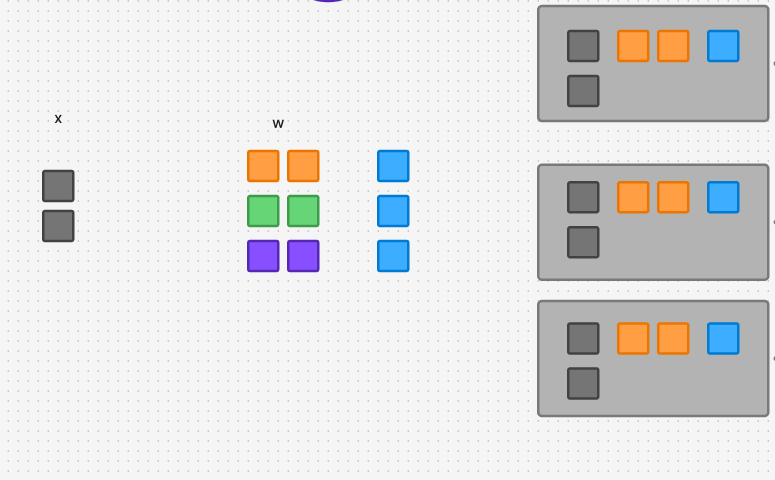

In [18]:
print('input x:\n',x)
print("\nHidden layer linear output (z1):\n", z1)
print("\nHidden layer activation (a1, after ReLU):\n", a1)
print("\nOutput layer linear output (z2):\n", z2)
print("\nFinal output (a2, after sigmoid – can be seen as probability):\n", a2)

input x:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Hidden layer linear output (z

---

# Exercise

In [19]:
np.random.seed(42)

#input: 2 features
x1 = np.array([[2],
              [1],
              [1],
              [1],
              [1],
              [2],
              [2],
              [2],
              [2],
              [2]])       #shape(2,1)

print(f'X:\n{x1}')

X:
[[2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]


In [20]:
w1 = np.random.randn(3,2)       # weight for output layer (3,2)
b1 = np.random.randn(3,1)       # bias for output layer (3,1)

print(f'W:\n{w1}\nB:\n{b1}')

W:
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]]
B:
[[ 1.57921282]
 [ 0.76743473]
 [-0.46947439]]
